In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import env

import scipy.stats as stats


In [36]:
df = pd.read_csv('zillow.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
df.shape,df.columns

((77579, 69),
 Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
        'propertylandusetypeid', 'heatingorsystemtypeid', 'buildingclasstypeid',
        'architecturalstyletypeid', 'airconditioningtypeid', 'id',
        'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
        'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
        'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
        'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
        'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
        'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
        'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
        'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertycountylandusecode', 'propertyzoningdesc',
        'rawcensustractandblock', 'regionidcity', 'regionidcounty',
        'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
        'un

In [38]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [39]:
df.drop(df[df.parcelid.duplicated()].index,inplace=True) #Remove duplicates from parcelid

In [40]:
# Drop most of the id columns - prepare
ids = [col for col in df.columns if 'id' in col][1:]
del ids [-2]
df = df.drop(columns =ids, axis=1)

In [46]:
# Removes all columns with more than 20,000 null values
n = df.isnull().sum()>20000
df = df.loc[:,~n]

In [47]:
# Create list of columns that still contain nulls
nulls = [col for col in df if df[col].isnull().sum()>0]

In [55]:
df.calculatedbathnbr.fillna(df.calculatedbathnbr.value_counts().index[0],inplace=True)

In [59]:
df.calculatedfinishedsquarefeet.fillna(df.calculatedfinishedsquarefeet.mean(),inplace=True)

In [60]:
del df.finishedsquarefeet12 #Same as calculatedfinishedsquarefeet

0    3100.0
1    1465.0
2    1243.0
3    2376.0
4    1312.0
Name: finishedsquarefeet12, dtype: float64

In [61]:
df.calculatedfinishedsquarefeet.head()

0    3100.0
1    1465.0
2    1243.0
3    2376.0
4    1312.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [62]:
df.logerror.head()

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64

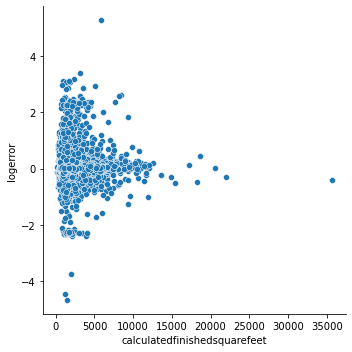

In [63]:
sns.relplot(data = df, x='calculatedfinishedsquarefeet',y='logerror')

In [70]:
stats.spearmanr(df.calculatedfinishedsquarefeet,df.logerror)

SpearmanrResult(correlation=0.07180233511971909, pvalue=5.6114819609392214e-89)

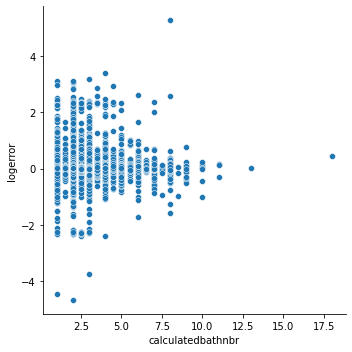

In [65]:
sns.relplot(data = df, x='calculatedbathnbr',y='logerror')

In [71]:
stats.spearmanr(df.calculatedbathnbr,df.logerror)

SpearmanrResult(correlation=0.05957118519577404, pvalue=8.851606310869597e-62)

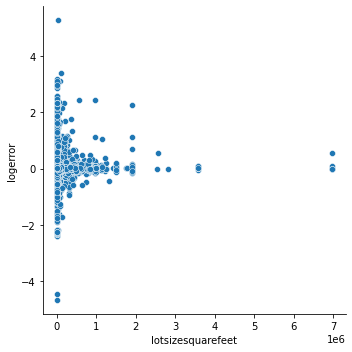

In [66]:
sns.relplot(data = df, x='lotsizesquarefeet',y='logerror')

In [72]:
stats.spearmanr(df.lotsizesquarefeet,df.logerror)

SpearmanrResult(correlation=nan, pvalue=nan)

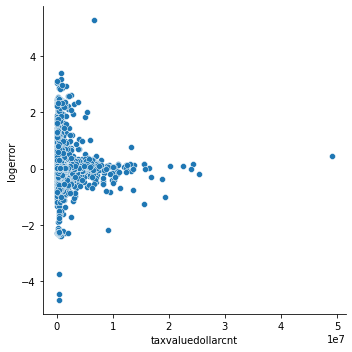

In [67]:
sns.relplot(data = df, x='taxvaluedollarcnt',y='logerror')

In [73]:
stats.spearmanr(df.taxvaluedollarcnt,df.logerror)

SpearmanrResult(correlation=nan, pvalue=nan)